# Сборный проект

В рамках данного проекта необходимо для интернет-магазина по продаже компьютерных игр выявить закономерности, определяющие успешность компьютерной игры, что позволит сделать ставку на потенциально популярный продукт, построить прогноз на будущий год и спланировать рекламные кампании.

В распоряжении имеются данные до 2016 года: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

# Исследование будем проводить в несколько шагов:

- Откроем файл и изучим общую информацию
- Подготовим данные
- Скорректируем названия столбцов
- Обработаем пропуски и преобразуем типы
- Подсчитаем суммарные продажи во всех регионах
- Проанализируем данные

    - Посчитаем количество игр в разные годы
    - Рассмотрим динамику продаж по платформам за весь период и за актуальный период
    - Определим влияние на продажи отзывов пользователей и критиков
    - Посмотрим на распределение по жанрам

    - Составим портрет пользователя каждого региона

    - Определим самые популярные платформы для каждого региона
    - Определим самые популярные жанры
    - Выявим влияние рейтинга ESRB на продажи
- Проверим гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - Средние пользовательские рейтинги жанров Action и Sports разные
Напишем общий вывод

##  1. Открыть файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 1.1 Вывод
Нам представлен датафрейм:

Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы

- Присутствуют типы данных: float64,object

##  2. Подготовим данные
- Заменим названия столбцов (приведём к нижнему регистру);

- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

Обработаем пропуски при необходимости:
-  Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;

- Опишием причины, которые могли привести к пропускам;

- Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберём это значение и опишите, как его обработать;

- Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
#Замените названия столбцов (приведите к нижнему регистру);
data.columns = data.columns.str.lower()

In [5]:
data.isna().sum()   

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
#Прочитав в интернете возможное определение аббревиатуры tbd, это может означать, что юзер поставит оценку позже

In [8]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
data['total_sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [10]:
#Преобразуйте данные в нужные типы.
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')

In [11]:
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)

Заполнил пропущенный рейтинг нулями, в дальнейшем анализе буду отбрасывать эти значения

### 2.1 Вывод

Привел названия столбцов к нижнему регистру 

Обнаружил пропуски:
- name не понятно

- year_of_release не понятно

- genre не понятно 

- Возможно в critic_score критик не указал оценку, в user_score не поставили оценку игре(Прочитав в интернете возможное определение аббревиатуры tbd, это может означать, что юзер поставит оценку позже), заменил 'tbd' на Nan

- Возможно в rating организация ESRB не указала рейтинг данной игре и скорее всего не имеет возрастного ограничения и все могут играть в игру

Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

##  3. Проведём исследовательский анализ данных

1.Посмотрим, сколько игр выпускалось в разные годы. 
- Важны ли данные за все периоды?


2.Посмотрим, как менялись продажи по платформам. 

- Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам.

- За какой характерный срок появляются новые и исчезают старые платформы?

3.Возьмём данные за соответствующий актуальный период. 

- Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. 


Основной фактор — эти данные помогут построить прогноз на 2017 год.

4.Не учитываем в работе данные за предыдущие годы.

5.Какие платформы лидируют по продажам, растут или падают? 
- Выберем несколько потенциально прибыльных платформ.

6.Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Опишием результат.

7.Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.

8.Соотнесём выводы с продажами игр на других платформах.

9.Посмотрим на общее распределение игр по жанрам.
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

In [12]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 
game = data.query('year_of_release != 0').pivot_table(index ='year_of_release', values = 'name', aggfunc = 'count')
game

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [13]:
game = game.iloc[22:]

In [14]:
game = game.reset_index()

<AxesSubplot:xlabel='year_of_release', ylabel='name'>

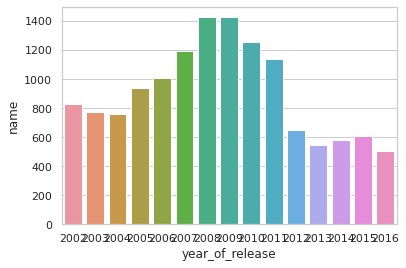

In [15]:

sns.set(style='whitegrid')
sns.barplot(x='year_of_release', y="name", data=game)

<AxesSubplot:xlabel='year_of_release', ylabel='name'>

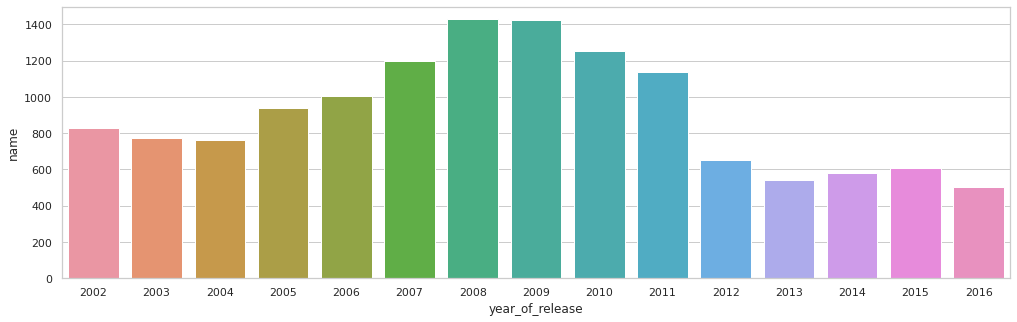

In [16]:
plt.figure(figsize=(17,5))
sns.barplot(x = game['year_of_release'],y =game['name'])

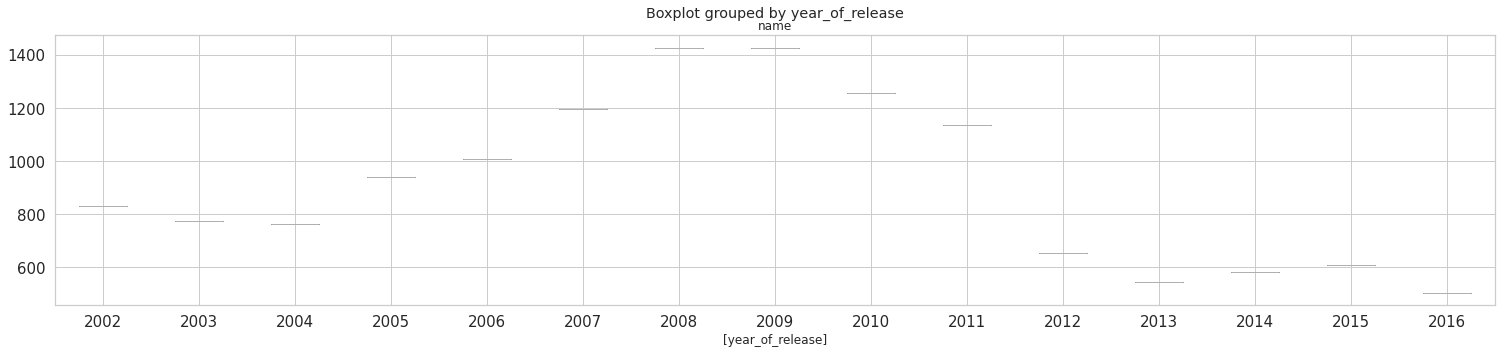

In [17]:
game.boxplot( by = 'year_of_release', fontsize=15,figsize = (25,5))
plt.show()

Вывод:
Индустрия начала активно развиваться примерно с 1994 года. Больше всего продаж в 2006-2011 годах, но т.к. это динамично меняющаяся индустрия, то тренд мог поменяться. Выделяю актуальный период 2014 - 2016 год.


Выделил актуальный период - 2014 - 2016

In [18]:
platform_table = data.query('year_of_release == [2014,2015,2016]')

In [19]:
#Посмотрите, как менялись продажи по платформам.
platform = platform_table['total_sale'].groupby(platform_table['platform']).sum()
platform.sort_values(ascending = False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sale, dtype: float64

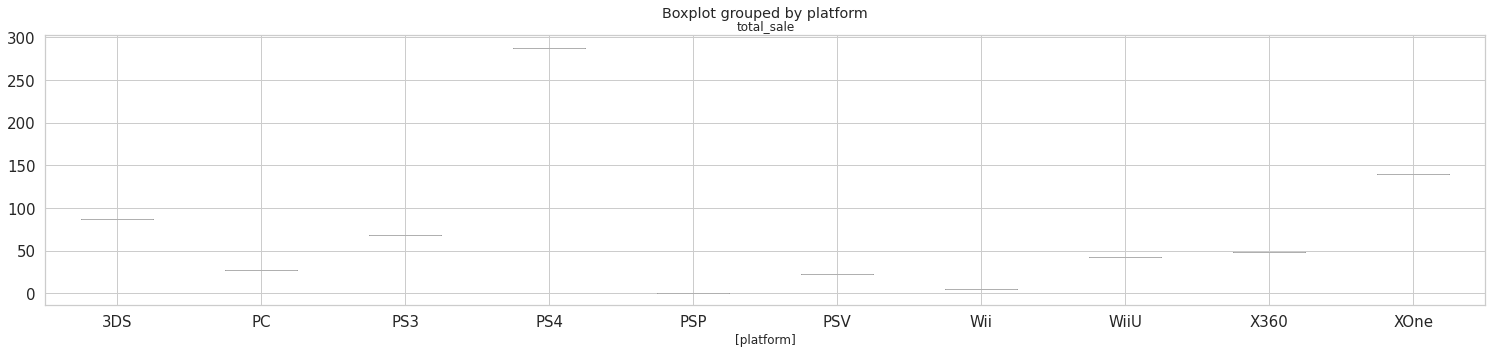

In [20]:
platform.reset_index().sort_values('total_sale', ascending = False).boxplot(by = 'platform', fontsize=15,figsize = (25,5))
plt.show()

<AxesSubplot:xlabel='platform', ylabel='total_sale'>

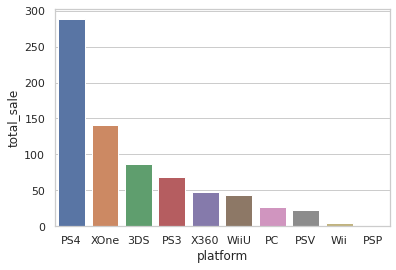

In [21]:

platform1 = platform_table.groupby('platform')['total_sale'].sum().sort_values(ascending=False).reset_index()

sns.set(style='whitegrid')
sns.barplot(x='platform', y="total_sale", data=platform1 )

In [22]:
platform10 = platform.sort_values(ascending = False).head(10)
platform10

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sale, dtype: float64

Вывод:
    
Самые популярные платформы:

- PS4  
- XOne   
- 3DS  
- PS3      
- X360      
- WiiU      
- PC  
 

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
- За какой характерный срок появляются новые и исчезают старые платформы?

In [23]:
#За какой характерный срок появляются новые и исчезают старые платформы?
platform_year = data.query('year_of_release != 0').pivot_table(index = "platform", values ='year_of_release', aggfunc = ['min', 'max', 'median'])
platform_year

,min,max,median
,year_of_release,year_of_release,year_of_release
platform,,,
2600,1980,1989,1982.0
3DO,1994,1995,1995.0
3DS,2011,2016,2013.0
DC,1998,2008,2000.0
DS,1985,2013,2008.0
GB,1988,2001,1997.0
GBA,2000,2007,2003.0
GC,2001,2007,2003.0


Вывод:
Новые появляются за 2 года, старые исчезают примерно за 10 лет.

# Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [24]:
platform_total_sale = platform_table.pivot_table(index = "platform", values ='total_sale', aggfunc = 'sum' )
platform_total_sale = platform_total_sale.reset_index()
platform_total_sale.columns = ['platform', 'sum']
platform_total_sale.sort_values('sum', ascending = False)

,platform,sum
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


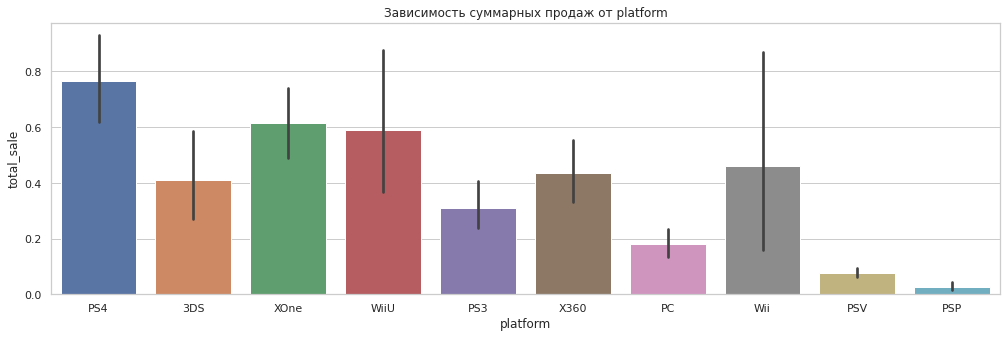

In [25]:
plt.figure(figsize=(17,5))
sns.barplot(platform_table['platform'],platform_table['total_sale'])
plt.title(f'Зависимость суммарных продаж от {"platform"}')
plt.show()

Какие платформы лидируют по продажам? - PS4, XOne, 3DS. 

Растёт - PS4,XOne т.к. на рынке только появились

Падает -  Wii, PSP.

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size="4"><b>Комментарий ревьюера 🚀</b></font>
    <br />
    <font size="3", color = "black">
    <br /> Хороший анализ продаж по топ платформам
     <br />
    </font>

</div>

# Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

# Опишите результат.

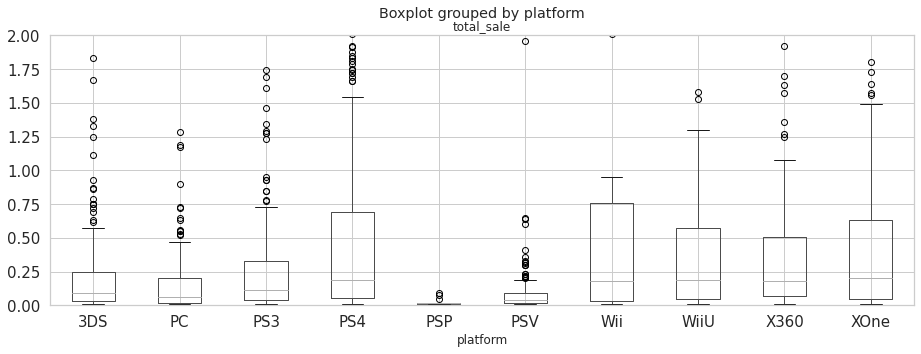

In [26]:
platform_table.boxplot(column='total_sale', by = 'platform', fontsize=15,figsize = (15,5))
plt.ylim(0, 2)
plt.show()

Вывод:
В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками.
Метод boxplot() позволяет визуально оценить характеристики распределения.


Наример, нормальные значения для популярных платформ: 

PS4:   0 - 1.52

XOne: 0 - 1.49

WiiU:  0 - 1.30

Wii:  0 - 0.95

X360:  0 - 1.1

# Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [27]:
ps4 = platform_table.query('critic_score != 0')
ps4 = ps4.query('user_score != 0')

# PS4

In [28]:
#ps4

In [29]:
ps4 = ps4.query('platform =="PS4"')
ps4['critic_score'] = ps4['critic_score'] / 10 #т.к. критики используют 100 бальную систему, а юсеры 10бальную

In [30]:
ps4['critic_score'] = ps4['critic_score'].astype('float')
ps4['user_score'] = ps4['user_score'].astype('float') 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


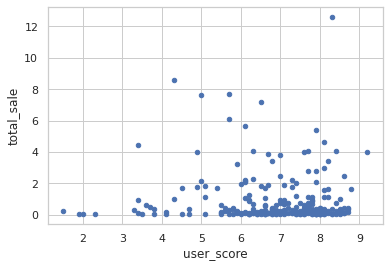

In [31]:
ps4.plot.scatter( y = 'total_sale',x = 'user_score')
plt.show() 
#Чем выше оценка, тем больше продаж

Вывод: 
По диаграмме рассеяния можно сказать: Чем выше оценка пользователя, тем больше продаж

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


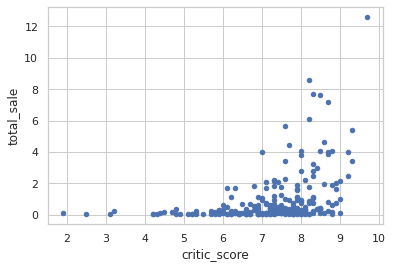

In [32]:
ps4.plot.scatter( y = 'total_sale',x = 'critic_score')
plt.show()

Вывод: 
По диаграмме рассеяния можно сказать: Чем выше оценка критика, тем больше продаж

In [33]:
ps4.corr() # Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный.
#связь сильная

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sale
year_of_release,1.000000,-0.230985,-0.183494,-0.093172,-0.221852,-0.043417,0.028938,-0.216492
na_sales,-0.230985,1.000000,0.712972,0.566980,0.915730,0.410773,-0.018847,0.892578
eu_sales,-0.183494,0.712972,1.000000,0.541119,0.934511,0.339526,-0.067377,0.951783
jp_sales,-0.093172,0.566980,0.541119,1.000000,0.598046,0.378852,0.182245,0.618891
other_sales,-0.221852,0.915730,0.934511,0.598046,1.000000,0.403824,-0.047267,0.998054
critic_score,-0.043417,0.410773,0.339526,0.378852,0.403824,1.000000,0.546434,0.401903
user_score,0.028938,-0.018847,-0.067377,0.182245,-0.047267,0.546434,1.000000,-0.043186
total_sale,-0.216492,0.892578,0.951783,0.618891,0.998054,0.401903,-0.043186,1.000000


Вывод: Нам интересна ячейка на пересечении user_score и critic_score - 0.546434

Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный.

Корреляция в 0.54 говорит о наличии связи, однако не слишком сильной. 


# Соотнесём выводы с продажами игр на других платформах.

# XOne

In [34]:
#platform_table_top_10['platform'].value_counts()

In [35]:
#XOne

In [36]:
XOne = platform_table.query('critic_score != 0')
XOne = XOne.query('user_score != 0')

In [37]:
XOne = XOne.query('platform =="XOne"')
XOne['critic_score'] = XOne['critic_score'] / 10

In [38]:
XOne['critic_score'] = XOne['critic_score'].astype('float')
XOne['user_score'] = XOne['user_score'].astype('float') 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


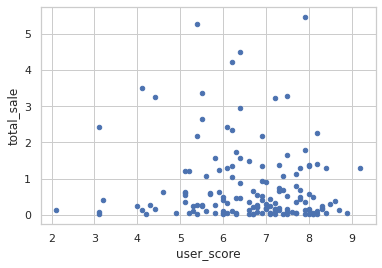

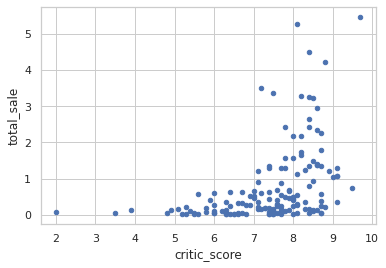

In [39]:
XOne.plot.scatter( y = 'total_sale',x = 'user_score')
 
XOne.plot.scatter( y = 'total_sale',x = 'critic_score')
plt.show()

In [40]:
XOne.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sale
year_of_release,1.000000,-0.263329,-0.222637,-0.196379,-0.270276,-0.007341,-0.006256,-0.269769
na_sales,-0.263329,1.000000,0.678859,0.406446,0.982382,0.394424,-0.087831,0.955669
eu_sales,-0.222637,0.678859,1.000000,0.382396,0.801760,0.379315,-0.080413,0.864920
jp_sales,-0.196379,0.406446,0.382396,1.000000,0.424672,0.204256,0.062330,0.435725
other_sales,-0.270276,0.982382,0.801760,0.424672,1.000000,0.418917,-0.092088,0.993002
critic_score,-0.007341,0.394424,0.379315,0.204256,0.418917,1.000000,0.440977,0.422112
user_score,-0.006256,-0.087831,-0.080413,0.062330,-0.092088,0.440977,1.000000,-0.091734
total_sale,-0.269769,0.955669,0.864920,0.435725,0.993002,0.422112,-0.091734,1.000000


Вывод:

Продаж становится больше с увеличением оценки пользователя и критиков.

Корреляция в 0.440977 говорит о наличии связи, однако не слишком сильной. Меньше, чем в PS4

# WiiU 

In [41]:
wiiu = platform_table.query('critic_score != 0')
wiiu = wiiu.query('user_score != 0')

In [42]:
wiiu = wiiu.query('platform =="WiiU"')
wiiu['critic_score'] = wiiu['critic_score'] / 10
wiiu['critic_score'] = wiiu['critic_score'].astype('float')
wiiu['user_score'] = wiiu['user_score'].astype('float') 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


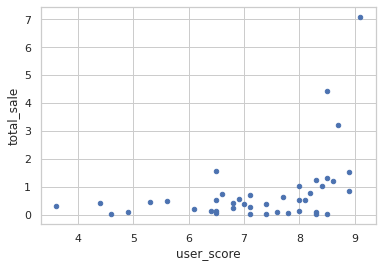

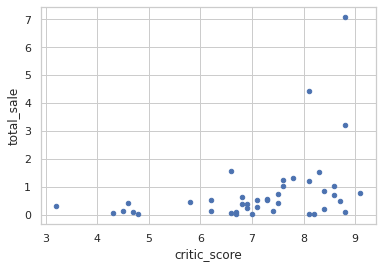

In [43]:
wiiu.plot.scatter( y = 'total_sale',x = 'user_score')
wiiu.plot.scatter( y = 'total_sale',x = 'critic_score')
plt.show()

In [44]:
wiiu.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sale
year_of_release,1.000000,-0.176863,-0.190985,-0.080665,-0.178952,0.034322,0.004625,-0.161889
na_sales,-0.176863,1.000000,0.993496,0.873009,0.999160,0.378822,0.405636,0.990513
eu_sales,-0.190985,0.993496,1.000000,0.890202,0.995703,0.392257,0.417426,0.993665
jp_sales,-0.080665,0.873009,0.890202,1.000000,0.880028,0.311608,0.374482,0.929887
other_sales,-0.178952,0.999160,0.995703,0.880028,1.000000,0.384048,0.412000,0.992579
critic_score,0.034322,0.378822,0.392257,0.311608,0.384048,1.000000,0.763536,0.375640
user_score,0.004625,0.405636,0.417426,0.374482,0.412000,0.763536,1.000000,0.411451
total_sale,-0.161889,0.990513,0.993665,0.929887,0.992579,0.375640,0.411451,1.000000


Вывод:

Корреляция - 0.763536, связь присутствует

# Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [45]:
#platform_table_top_10['year_of_release'].value_counts()

In [46]:
table_genre = platform_table.pivot_table(index = "genre", values ='total_sale', aggfunc = ['count', 'sum'] )

table_genre.columns = ['count', 'sum'] 

In [47]:
table_genre.sort_values('sum', ascending = False)

,count,sum
genre,,
Action,619,199.36
Shooter,128,170.94
Sports,161,109.48
Role-Playing,221,101.44
Misc,113,37.55
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09
Adventure,185,17.55


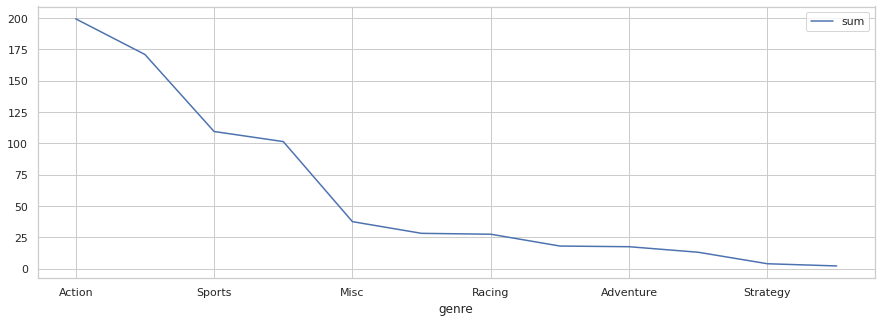

In [48]:
table_genre.sort_values('sum', ascending = False).plot(y = 'sum', figsize = (15,5))
plt.show()

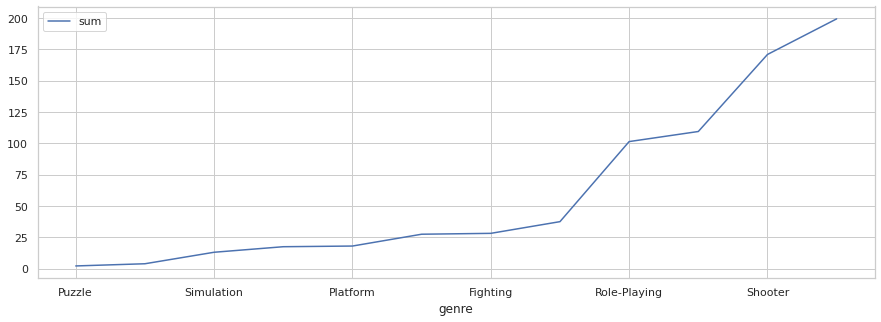

In [49]:
table_genre.sort_values('sum').plot(y = 'sum', figsize = (15,5))
plt.show()
#самые низкие продажи

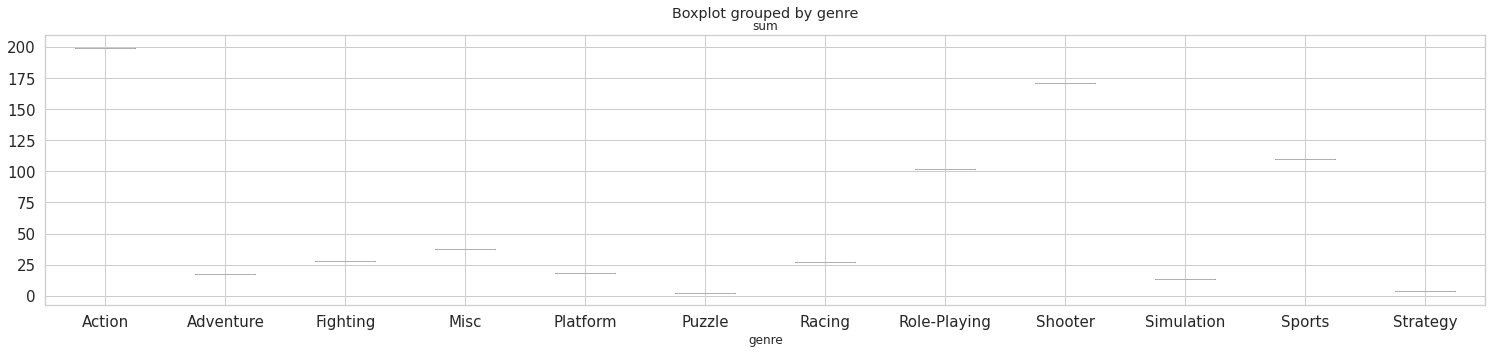

In [50]:
table_genre.sort_values('sum', ascending = False).boxplot(column='sum', by = 'genre', fontsize=15,figsize = (25,5))

plt.show()

In [51]:
table_genre= table_genre.reset_index().sort_values('sum', ascending = False)

<AxesSubplot:xlabel='genre', ylabel='sum'>

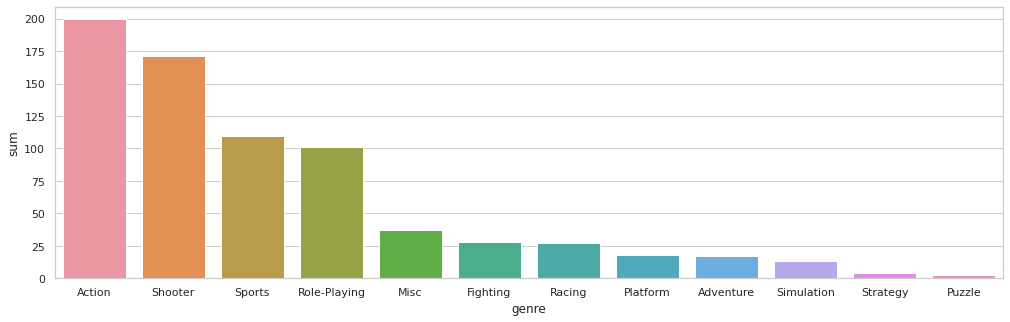

In [52]:
plt.figure(figsize=(17,5))
sns.barplot(x = table_genre['genre'],y =table_genre['sum'])

Вывод:
- Action	, Shooter, Sports, Role-Playing   Жанры с самыми высокими продажами 
- Puzzle, Strategy, Simulation, Adventure  Жанры с самыми низкими продажами

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


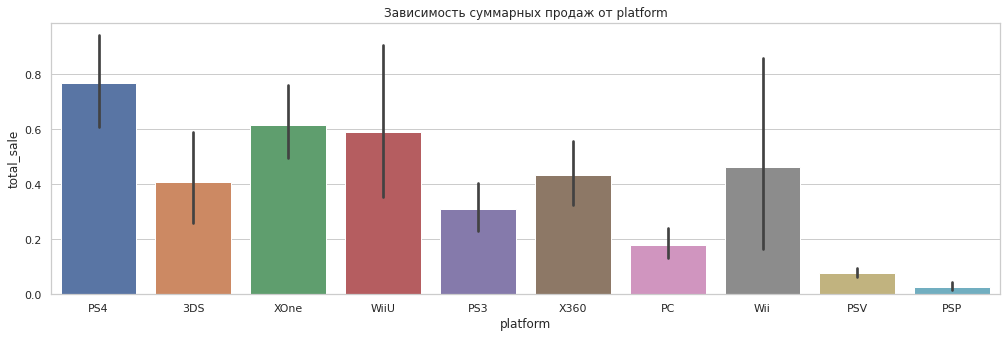

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


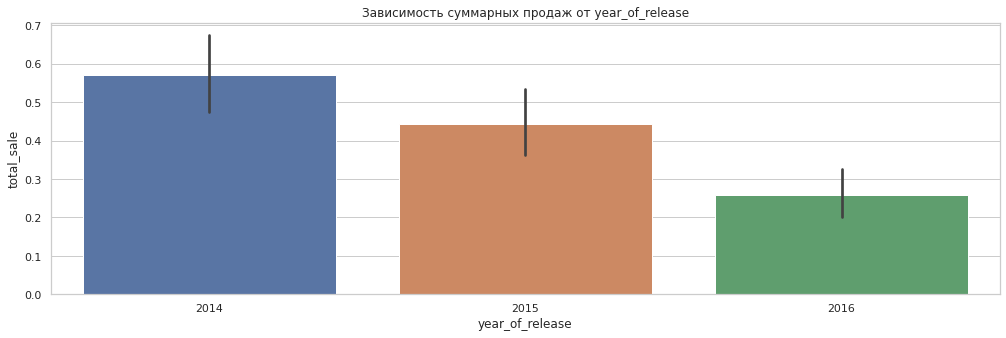

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


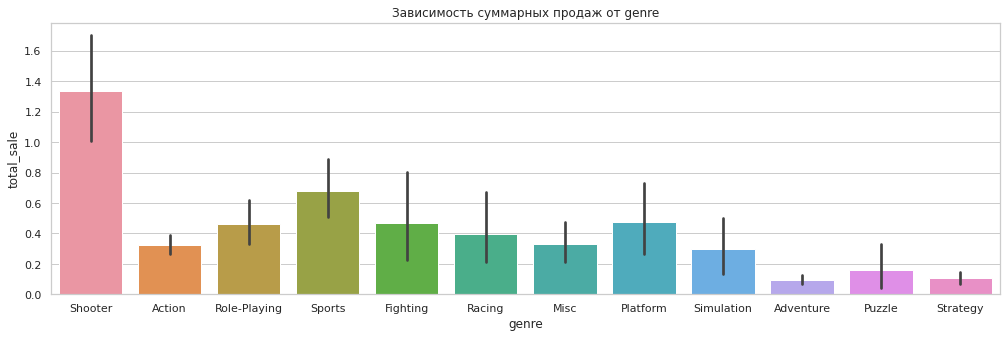

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


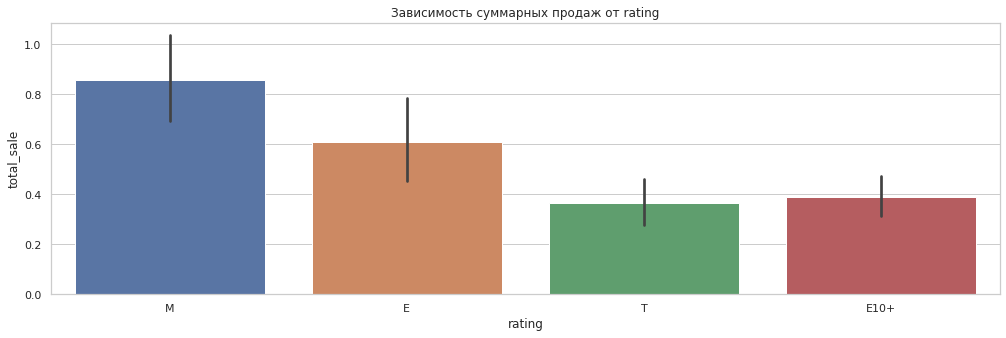

In [53]:
factors_cat = ['platform','year_of_release','genre','rating']
for i in factors_cat:    
    plt.figure(figsize=(17,5))
    sns.barplot(platform_table[i],platform_table['total_sale'])
    plt.title(f'Зависимость суммарных продаж от {i}')
    plt.show()

### 3.1 Вывод

1) Aктуальный период - 2014 - 2016

2) Самые популярные платформы:

PS4

XOne

3DS

PS3

X360

WiiU

PC

3) 

Новые появляются за 2 года, старые исчезают примерно за 10 лет.

Какие платформы лидируют по продажам? - PS4, XOne, 3DS.

Растёт - PS4,XOne т.к. на рынке только появились

Падает - Wii, PSP.

4) 

Action , Shooter, Sports, Role-Playing Жанры с самыми высокими продажами

Puzzle, Strategy, Simulation, Adventure Жанры с самыми низкими продажами

## 4. Составим портрет пользователя каждого региона

# Определим для пользователя каждого региона (NA, EU, JP):


- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [54]:
table_na = platform_table.pivot_table(index ='platform', values = ['na_sales', 'eu_sales','jp_sales'], aggfunc = 'sum' )

table_na.sort_values('jp_sales' ,ascending =False)
#.sort_values('jp_sales' ,ascending =False)
#.sort_values('eu_sales' ,ascending =False)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PS4,130.04,15.02,98.61
PSV,3.53,14.54,2.52
PS3,25.54,11.22,22.05
WiiU,13.15,7.31,19.36
PSP,0.00,0.36,0.00
XOne,46.25,0.32,81.27
X360,15.49,0.08,28.30
PC,17.97,0.00,7.23


In [55]:
#table_na.reset_index()

In [56]:
table_na.columns = ['Европа','Япония','Америка']

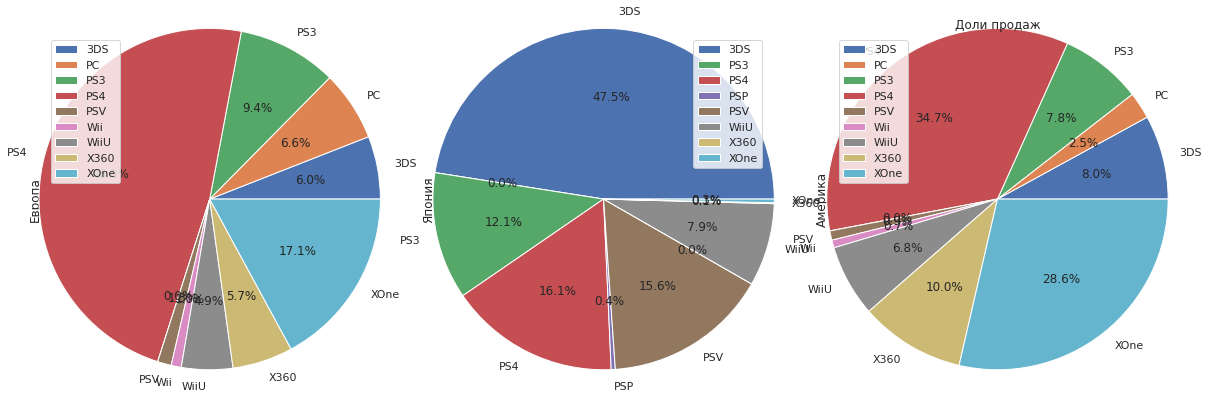

In [57]:

table_na.plot.pie(subplots=True,radius = 1.3, figsize=(20,10),autopct='%1.1f%%')  #,startangle=180,label="",radius = 1,center = (50,50)
plt.title('Доли продаж')
#plt.axis('equal')
plt.show()

In [58]:
#table_na.sort_values('na_sales' ,ascending =False).plot()
#plt.show()

In [59]:
#table_na.sort_values('eu_sales' ,ascending =False).plot()
#plt.show()

In [60]:
#table_na.sort_values('jp_sales' ,ascending =False).plot()
#plt.show()

In [61]:
#table_na.sort_values('Япония' ,ascending =False)

- ТОП 5 америки: 


PS4	 - 98.61 продаж

XOne - 81.27 продаж

X360 - 28.30 продаж

3DS - 22.64 продаж

PS3 - 22.05 продаж

- ТОП 5 ЕВРОПЫ:   

PS4 - 130.04 продаж
XOne - 46.25 продаж	
PS3 - 25.54 продаж	
PC - 17.97 продаж	
3DS - 16.12 продаж


- ТОП 5 ЯПОНИИ: 

3DS - 44.24 продаж	 
PS4 - 15.02 продаж
PSV - 14.54 продаж	
PS3 - 11.22 продаж	
WiiU - 7.31 продаж	




- Самые популярные жанры (топ-5). Поясните разницу.

In [62]:
table_genre_top5 =platform_table.pivot_table(index ='genre', values = ['na_sales', 'eu_sales','jp_sales'], aggfunc = 'sum' )
table_genre_top5

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


In [63]:
table_genre_top5.columns = ['Европа','Япония','Америка']

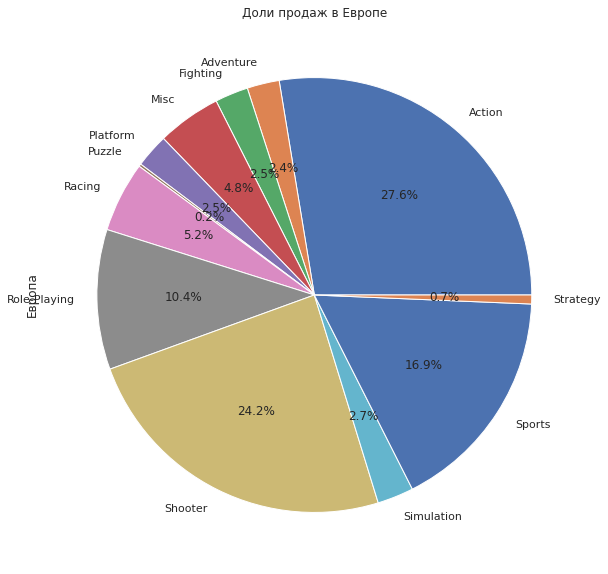

In [64]:
table_genre_top5['Европа'].plot.pie(subplots=True,radius = 1, figsize=(20,10),autopct='%1.1f%%') 
plt.title('Доли продаж в Европе')
plt.show()

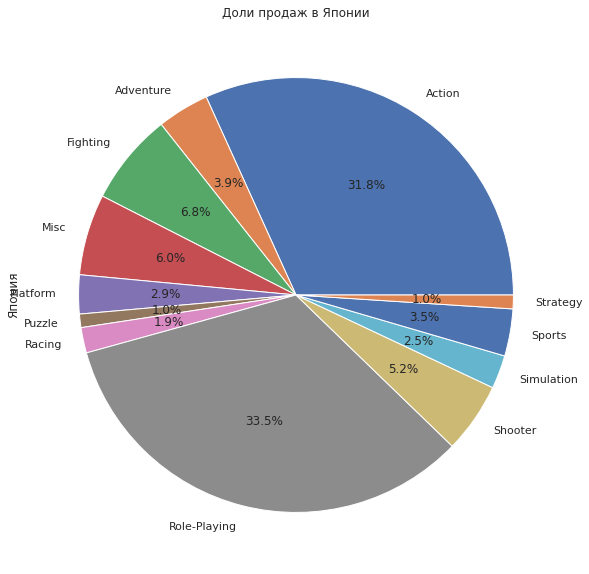

In [65]:
table_genre_top5['Япония'].plot.pie(subplots=True,radius = 1, figsize=(20,10),autopct='%1.1f%%') 
plt.title('Доли продаж в Японии')
plt.show()

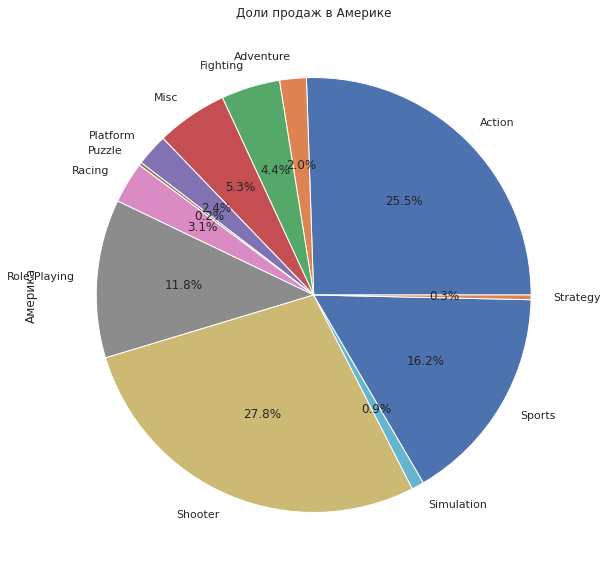

In [66]:
table_genre_top5['Америка'].plot.pie(subplots=True,radius = 1, figsize=(20,10),autopct='%1.1f%%') 
plt.title('Доли продаж в Америкe')
plt.show()

In [67]:
#table_genre_top5.sort_values('na_sales' ,ascending =False).plot()
#plt.show()

In [68]:
#table_genre_top5.sort_values('Европа', ascending = False)

#ТОП 5 жанры америки Shooter, Action, Sports, Role-Playing, Misc

#ТОП 5 жанры ЕВРОПЫ   Action, Shooter, Sports, Role-Playing, Racing

#ТОП 5 жанры ЯПОНИИ  Role-Playing,Action, Fighting, Misc, Shooter

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [69]:
#platform_table_top_10['rating'].value_counts()

In [70]:
platform_table['rating'] = platform_table['rating'].fillna('no rating')

/tmp/ipykernel_87/115189423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_table['rating'] = platform_table['rating'].fillna('no rating')


In [71]:
table_rating = platform_table.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales','total_sale'],aggfunc=sum)
table_rating.sort_values(by='na_sales',ascending=False)

,eu_sales,jp_sales,na_sales,total_sale
rating,,,,
M,93.44,8.01,96.42,226.54
no rating,58.95,56.90,64.72,198.97
E,58.06,8.94,50.74,133.13
T,34.07,14.78,38.95,99.13
E10+,26.16,4.46,33.23,71.68


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


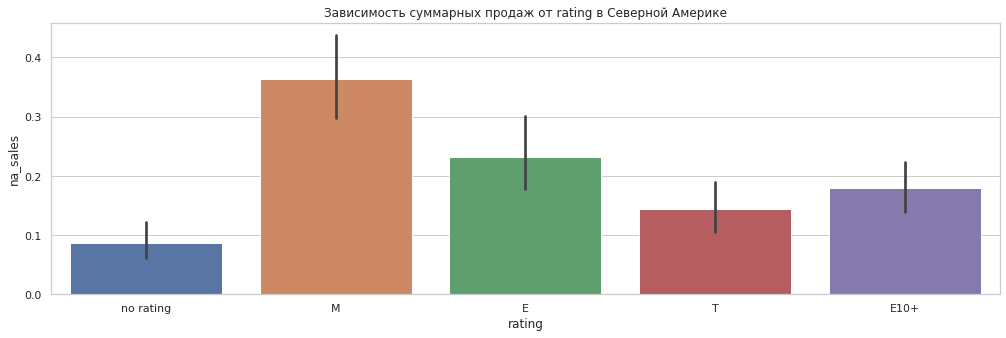

In [72]:
plt.figure(figsize=(17,5))
sns.barplot(platform_table['rating'],platform_table['na_sales'])
plt.title(f'Зависимость суммарных продаж от {"rating в Северной Америке"}')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


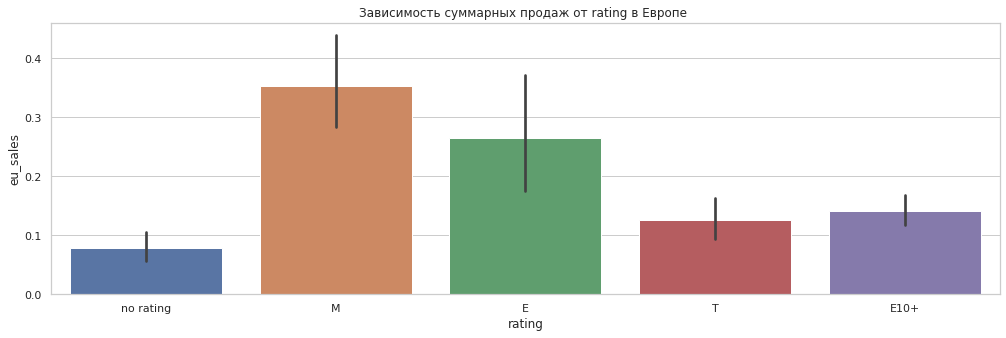

In [73]:
plt.figure(figsize=(17,5))
sns.barplot(platform_table['rating'],platform_table['eu_sales'])
plt.title(f'Зависимость суммарных продаж от {"rating в Европе "}')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


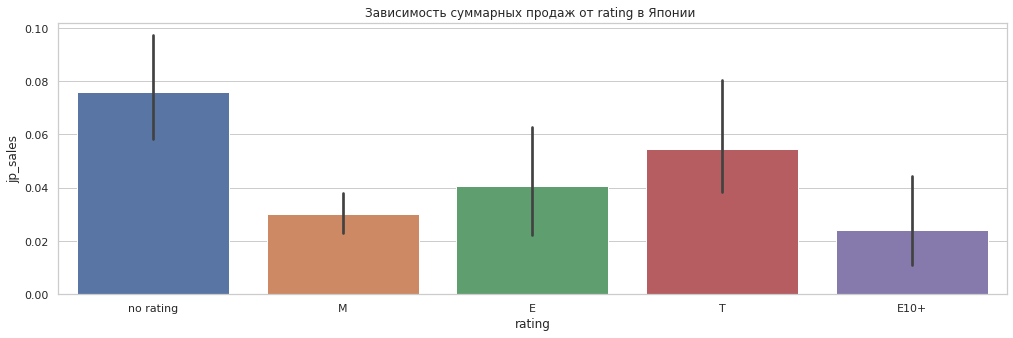

In [74]:
plt.figure(figsize=(17,5))
sns.barplot(platform_table['rating'],platform_table['jp_sales'])
plt.title(f'Зависимость суммарных продаж от {"rating в Японии "}')
plt.show()

### 4.1 Вывод

# ТОП 5 платформ 
- ТОП 5 платформ  Америке:

PS4, X360, PS3, PC, Wii

- ТОП 5 платформ Европы:

PS4, PS3, PC, X360, Wii

- ТОП 5 платформ Японии:

PS4, PS3, PSP, X360, дальше 0 продаж в японии


# ТОП 5 жанры 


- ТОП 5 жанры америки Action, Shooter, Sports, Role-Playing, Misc

- ТОП 5 жанры ЕВРОПЫ Action, Shooter, Sports, Role-Playing, Racing

- ТОП 5 жанры ЯПОНИИ Action, Role-Playing, Shooter, Fighting, Sports


# Рейтинги ESRB:

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»

«T» («Teen») — «Подросткам 13—19 лет»

«M» («Mature») — «От 17 лет»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» ( «Rating Pending»») — «Рейтинг ожидается»


- Лучшие продажи в зависимости рейтинга от организации ESRB в Америке: 

M - 96.42

no rating - 64.72

E - 50.74	

T - 38.95

- Лучшие продажи в зависимости рейтинга от организации ESRB в Европе: 

M - 93.44	

no rating - 58.95

E - 58.06

T	 - 34.07	

- Лучшие продажи в зависимости рейтинга от организации ESRB в Японии: 

no rating - 56.90

T - 14.78	

E - 8.94	

M - 8.01

Везде рейтинг E10+ в самом низу по продажам. Интересно, что в Японии преобладает no rating по продажам.
	


## 5. Проверим гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [75]:
platform_table['user_score'] = platform_table['user_score'].astype('float')

/tmp/ipykernel_87/3075376869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_table['user_score'] = platform_table['user_score'].astype('float')


In [76]:
score_xone = platform_table.query('platform == "PC"')['user_score']

score_pc = platform_table.query('platform == "XOne"')['user_score']


In [77]:
#score_pc.reset_index()

In [78]:
#score_xone

In [79]:
print('Cредний пользовательский рейтинг платформы Xbox One : ',score_xone.mean())

Cредний пользовательский рейтинг платформы Xbox One :  5.088741721854304


In [80]:
print('Cредний пользовательский рейтинг платформы  PC : ',score_pc.mean())

Cредний пользовательский рейтинг платформы  PC :  4.772368421052631


In [81]:
#H₀: Cредний пользовательский рейтинг платформы А равна среднему рейтингу платформы Б
#H₁: Cредний пользовательский рейтинг платформы А не равна среднему рейтингу платформы Б

alpha = 0.01
results = st.ttest_ind(
    score_xone, 
    score_pc)   #,equal_var = False

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.32800030965842586
Не получилось отвергнуть нулевую гипотезу


 Вывод:
Cредний пользовательский рейтинг платформы Xbox One равен среднему рейтингу платформы PC

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [82]:
score_action = platform_table.query('genre == "Action"')['user_score']
score_sports = platform_table.query('genre == "Sports"')['user_score']

In [83]:
print('Cредний пользовательский рейтинг жанра  Action : ',score_action.mean())

Cредний пользовательский рейтинг жанра  Action :  3.2437802907915994


In [84]:
print('Cредний пользовательский рейтинг жанра  Sports : ',score_sports.mean())

Cредний пользовательский рейтинг жанра  Sports :  4.121739130434783


In [85]:
#H₀: Cредний пользовательский рейтинг жанра А равен среднему рейтингу жанра Б
#H₁: Cредний пользовательский рейтинг жанра А не равен среднему рейтингу жанра Б
alpha = .01
results = st.ttest_ind(
    score_action, 
    score_sports)   #,equal_var = False

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.003247568418715718
Отвергаем нулевую гипотезу


### 5.1 Вывод:
Проверили гипотезы методом st.ttest_ind(), задали значение alpha = .01

Вывели средний пользовательский рейтинги, p-значение на экран.

И пришли к выводу что:

Cредний пользовательский рейтинг платформы Xbox One  равен среднему рейтингу платформы PC

Cредний пользовательский рейтинг жанра Action не равен среднему рейтингу жанра Sports 

##  6. Напишем общий вывод

### Вывод

Выявили в данных проблемы, подготовили данные к анализу.

###### Провели исследовательский анализ данных, после чего пришли к выводу, что:

1) Aктуальный период - 2001 - 2016

2) Самые популярные платформы: PS4, XOne, 3DS, PS3, X360, WiiU, PC

3) Новые появляются за 2 года, старые исчезают примерно за 10 лет.

Платформы лидирующие по продажам - PS4, XOne, 3DS.

Растёт - PS4, XOne т.к. на рынке только появилась

Падает - Wii, PSP

4) 

Action , Shooter, Sports, Role-Playing Жанры с самыми высокими продажами

Puzzle, Strategy, Simulation, Adventure Жанры с самыми низкими продажами

###### Составили портрет пользователя каждого региона:

###### ТОП 5 платформ 

- В Америке: PS4, XOne, X360, 3DS, PS3

- В Европе: PS4, XOne, PS3, PC, 3DS

- В Японии: 3DS, PS4, PSV, PS3, WiiU

###### ТОП 5 жанры 
- В Америке: Shooter, Action, Sports, Role-Playing, Misc

- В Европе: Action, Shooter, Sports, Role-Playing, Racing

- В Японии: Role-Playing, Action, Fighting, Misc, Shooter



###### Лучшие продажи в зависимости рейтинга от организации ESRB 

- В Америке:

M - 96.42

no rating - 64.72

E - 50.74	

T - 38.95

- В Европе: 

M - 93.44	

no rating - 58.95

E - 58.06

T	 - 34.07	

- В Японии:

no rating - 56.90

T - 14.78	

E - 8.94	

M - 8.01

Везде рейтинг E10+ в самом низу по продажам. В Японии преобладает no rating по продажам.

######  Проверили гипотезы 

И пришли к выводу что:

Cредний пользовательский рейтинг платформы Xbox One равен среднему рейтингу платформы PC

Cредний пользовательский рейтинг жанра Action не равен среднему рейтингу жанра Sports

